<a href="https://colab.research.google.com/github/prithvil98/GitDemo/blob/main/ABPFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/abp_accel.csv")

In [ ]:
df.head()

,timestamp,x,y,z
0,2015-06-12 13:30:00.161041,100,620,804
1,2015-06-12 13:30:00.260490,68,640,800
2,2015-06-12 13:30:00.359939,48,628,884
3,2015-06-12 13:30:00.459388,44,616,888
4,2015-06-12 13:30:00.558837,76,628,860


In [ ]:
df.tail()

,timestamp,x,y,z
2494239,2015-06-15 10:23:51.205563,16,976,388
2494240,2015-06-15 10:23:51.304964,24,968,404
2494241,2015-06-15 10:23:51.404365,20,984,400
2494242,2015-06-15 10:23:51.503766,20,988,392
2494243,2015-06-15 10:23:51.603167,28,980,400


In [ ]:
df.isnull().sum()

timestamp    0
x            0
y            0
z            0
dtype: int64

In [ ]:
df.shape

(2494244, 4)

In [ ]:
df.isnull().sum()

timestamp    0
x            0
y            0
z            0
dtype: int64

In [ ]:
df['x']=(df['x']/1000)*9.81
df['y']=(df['y']/1000)*9.81
df['z']=(df['z']/1000)*9.81
df['timestamp']=pd.to_datetime(df['timestamp'])
df['timestamp']=df['timestamp'].dt.round('3S')
df.head()

,timestamp,x,y,z
0,2015-06-12 13:30:00,0.98100,6.08220,7.88724
1,2015-06-12 13:30:00,0.66708,6.27840,7.84800
2,2015-06-12 13:30:00,0.47088,6.16068,8.67204
3,2015-06-12 13:30:00,0.43164,6.04296,8.71128
4,2015-06-12 13:30:00,0.74556,6.16068,8.43660


In [ ]:
df.set_index('timestamp',inplace=True)
df=df.resample('3S').mean()
df

,x,y,z
timestamp,,,
2015-06-12 13:30:00,1.194017,6.026143,8.279640
2015-06-12 13:30:03,1.008468,5.926548,8.339808
2015-06-12 13:30:06,-4.350408,4.918080,7.432056
2015-06-12 13:30:09,-7.558932,3.504132,5.722500
2015-06-12 13:30:12,-7.480916,3.427804,5.974606
...,...,...,...
2015-06-15 10:23:39,-2.381868,9.671352,2.519208
2015-06-15 10:23:42,-1.734408,9.798228,2.271996
2015-06-15 10:23:45,-2.374020,9.064440,2.328240


In [ ]:
df.reset_index(inplace=True)
df

,timestamp,x,y,z
0,2015-06-12 13:30:00,1.194017,6.026143,8.279640
1,2015-06-12 13:30:03,1.008468,5.926548,8.339808
2,2015-06-12 13:30:06,-4.350408,4.918080,7.432056
3,2015-06-12 13:30:09,-7.558932,3.504132,5.722500
4,2015-06-12 13:30:12,-7.480916,3.427804,5.974606
...,...,...,...,...
82673,2015-06-15 10:23:39,-2.381868,9.671352,2.519208
82674,2015-06-15 10:23:42,-1.734408,9.798228,2.271996
82675,2015-06-15 10:23:45,-2.374020,9.064440,2.328240
82676,2015-06-15 10:23:48,-3.458352,9.524856,1.390404


In [ ]:
# Taking 24 hour sample from the df for easier calculation
start_time = pd.to_datetime('2015-06-13 00:00:00') # select preferred date
end_time = pd.to_datetime('2015-06-14 00:00:00')
sample_24_hours = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]
sample_24_hours

,timestamp,x,y,z
12600,2015-06-13 00:00:00,4.060032,7.421592,5.961864
12601,2015-06-13 00:00:03,4.026024,7.381044,6.104436
12602,2015-06-13 00:00:06,3.931595,7.372057,6.085997
12603,2015-06-13 00:00:09,3.958008,7.424208,6.065196
12604,2015-06-13 00:00:12,4.015560,7.435980,5.984100
...,...,...,...,...
41396,2015-06-13 23:59:48,2.449884,8.219472,5.763048
41397,2015-06-13 23:59:51,2.500896,8.142300,5.846760
41398,2015-06-13 23:59:54,2.453808,8.224704,5.780052
41399,2015-06-13 23:59:57,2.445960,8.173692,5.889924


In [ ]:
sample_24_hours['total_acceleration']=np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
sample_24_hours

<ipython-input-12-1053ab1286d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_24_hours['total_acceleration']=np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)


,timestamp,x,y,z,total_acceleration
12600,2015-06-13 00:00:00,4.060032,7.421592,5.961864,10.349285
12601,2015-06-13 00:00:03,4.026024,7.381044,6.104436,10.390035
12602,2015-06-13 00:00:06,3.931595,7.372057,6.085997,10.336538
12603,2015-06-13 00:00:09,3.958008,7.424208,6.065196,10.371658
12604,2015-06-13 00:00:12,4.015560,7.435980,5.984100,10.355094
...,...,...,...,...,...
41396,2015-06-13 23:59:48,2.449884,8.219472,5.763048,10.333169
41397,2015-06-13 23:59:51,2.500896,8.142300,5.846760,10.331318
41398,2015-06-13 23:59:54,2.453808,8.224704,5.780052,10.347750
41399,2015-06-13 23:59:57,2.445960,8.173692,5.889924,10.367409


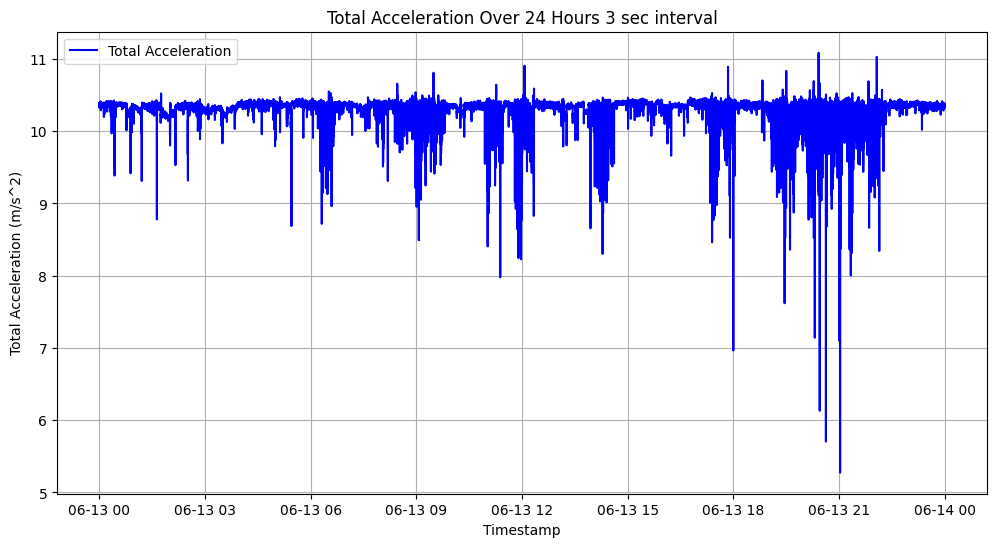

In [ ]:
# Visualize the Total Acceleration Time Series
plt.figure(figsize=(12, 6))
plt.plot(sample_24_hours['timestamp'], sample_24_hours['total_acceleration'], label='Total Acceleration', color='blue')
plt.title('Total Acceleration Over 24 Hours 3 sec interval')
plt.xlabel('Timestamp')
plt.ylabel('Total Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

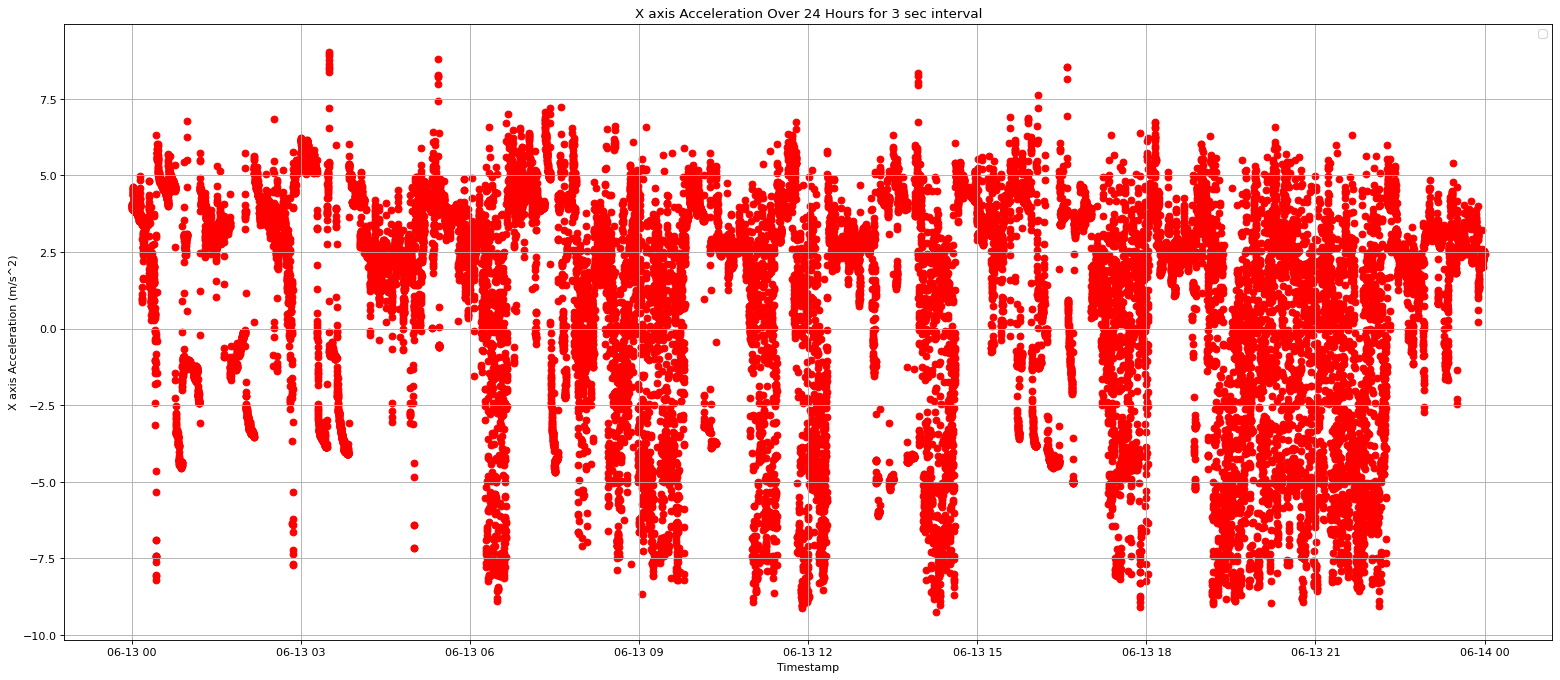

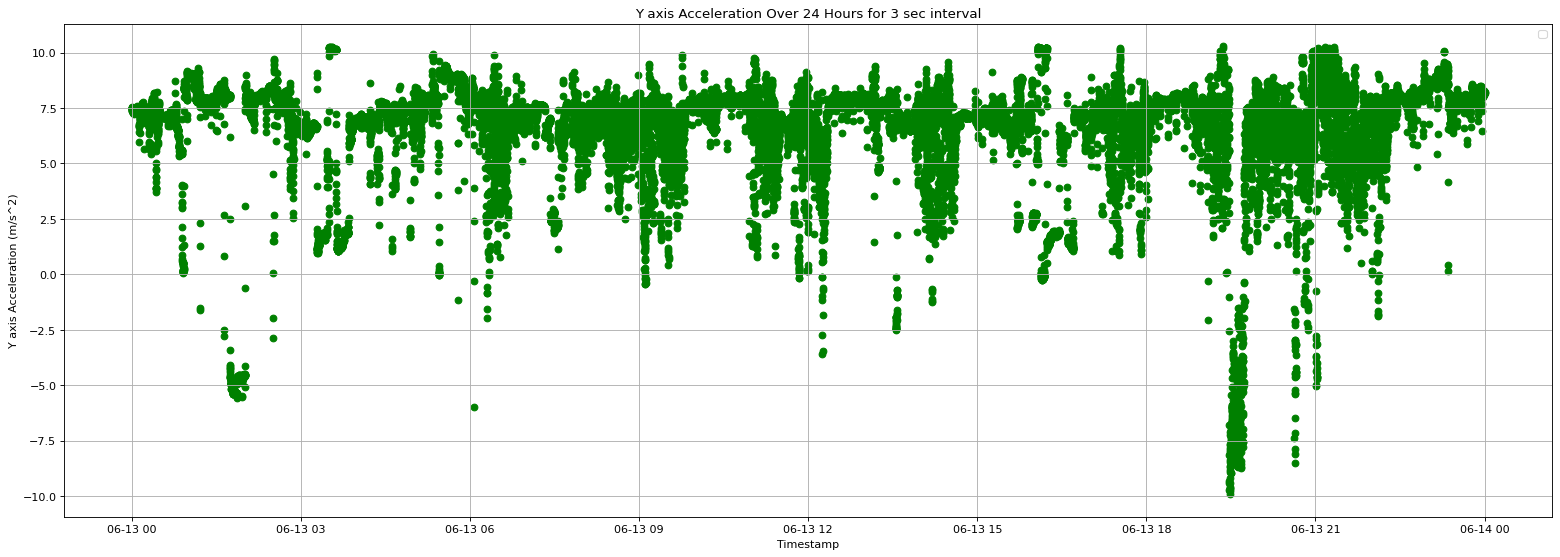

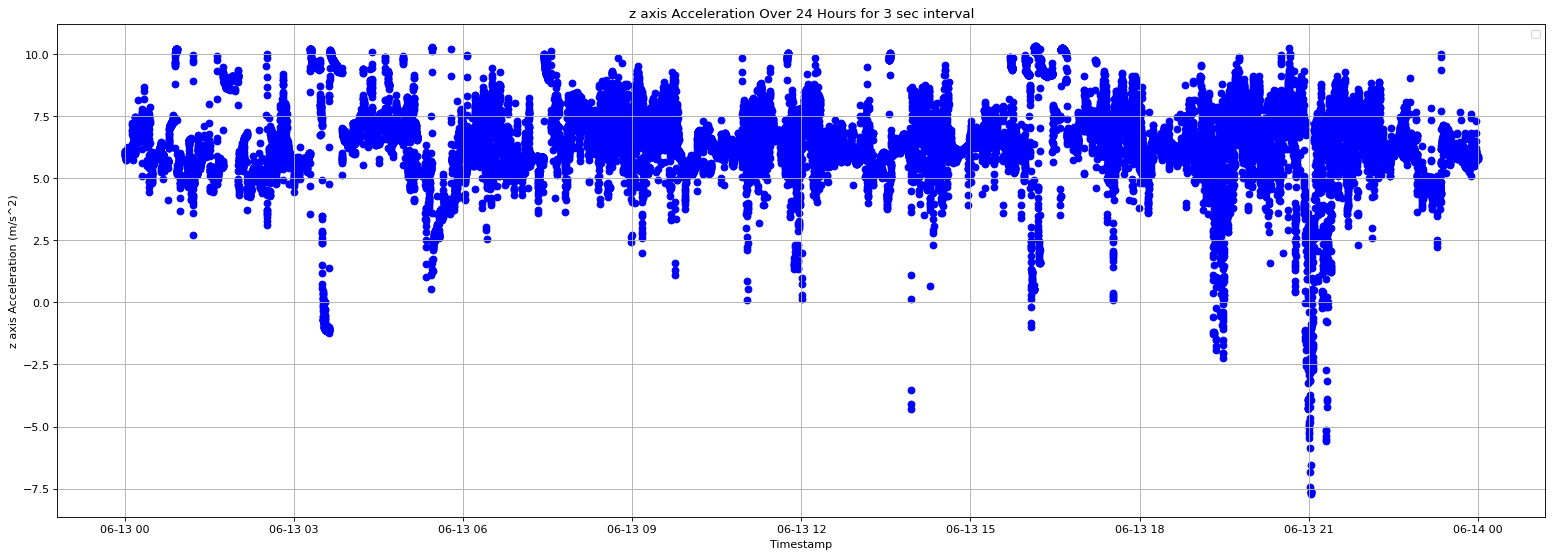

In [ ]:
plt.figure(figsize=(24, 10), dpi=80)
plt.scatter(sample_24_hours['timestamp'], sample_24_hours['x'], c='red')
plt.title('X axis Acceleration Over 24 Hours for 3 sec interval')
plt.xlabel('Timestamp')
plt.ylabel('X axis Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(sample_24_hours['timestamp'], sample_24_hours['y'], c='green')
plt.title('Y axis Acceleration Over 24 Hours for 3 sec interval')
plt.xlabel('Timestamp')
plt.ylabel('Y axis Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 8), dpi=80)
plt.scatter(sample_24_hours['timestamp'], sample_24_hours['z'], c='blue')
plt.title('z axis Acceleration Over 24 Hours for 3 sec interval')
plt.xlabel('Timestamp')
plt.ylabel('z axis Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
selected_features = ['x','y','z', 'total_acceleration']
bkp = sample_24_hours[selected_features]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

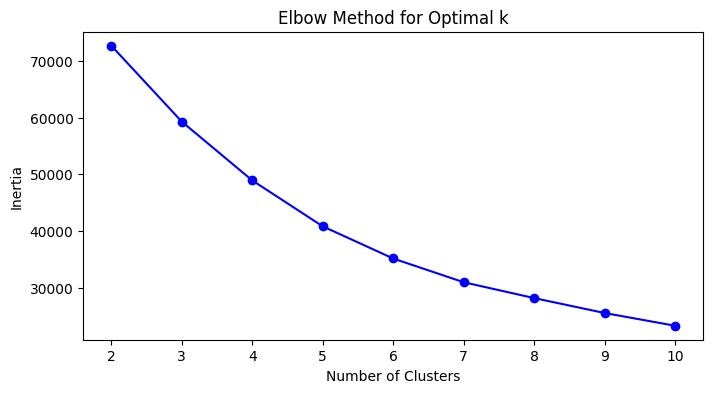

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sample_24_hours[['x', 'y', 'z', 'total_acceleration']])

# dertermine clusters by Elbow-method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-17-aec48ccf352f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_24_hours['cluster'] = cluster_labels


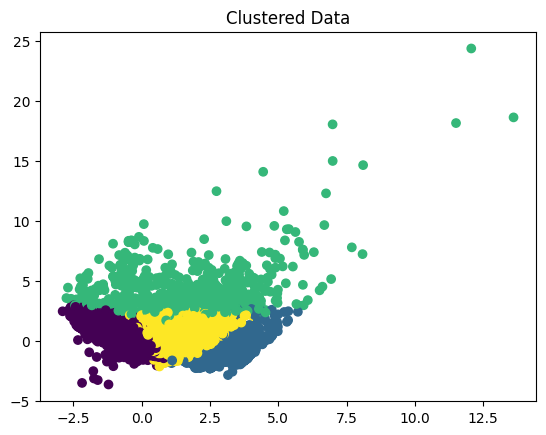

In [ ]:
optimal_k = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

#  add cluster labels  to  DataFrame
sample_24_hours['cluster'] = cluster_labels

# reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Visualize the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clustered Data')
plt.show()

In [ ]:
# Summary of the clustering model
num_clusters=4
cluster_centers = kmeans.cluster_centers_
cluster_sizes = sample_24_hours['cluster'].value_counts()

print(f"Number of Clusters: {num_clusters}")
print("Cluster Sizes:")
print(cluster_sizes)
print("\nCluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i} Center: {center}")

Number of Clusters: 4
Cluster Sizes:
0    19854
3     5713
1     2294
2      940
Name: cluster, dtype: int64

Cluster Centers:
Cluster 0 Center: [ 0.56616404  0.3975211  -0.17259328  0.33167407]
Cluster 1 Center: [-1.0729267  -2.6331434   1.53286981 -0.21124848]
Cluster 2 Center: [-1.09584706  0.06367858 -2.47575798 -3.14520438]
Cluster 3 Center: [-1.35738089 -0.33542928  0.39214266 -0.55072093]


In [ ]:
silhouette_avg = silhouette_score(sample_24_hours[['y', 'x', 'z']], sample_24_hours['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5510092722195179


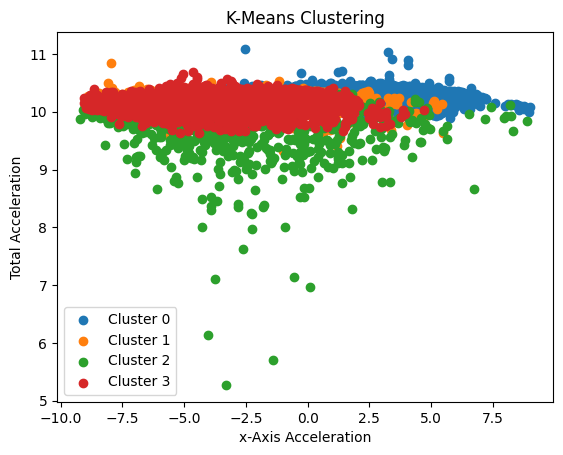

In [ ]:
# Visualize the clusters (example with 2D data)
for cluster_label in range(num_clusters):
    cluster_data = sample_24_hours[sample_24_hours['cluster'] == cluster_label]
    plt.scatter(cluster_data['x'], cluster_data['total_acceleration'], label=f'Cluster {cluster_label}')
plt.xlabel('x-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.legend()
plt.show()



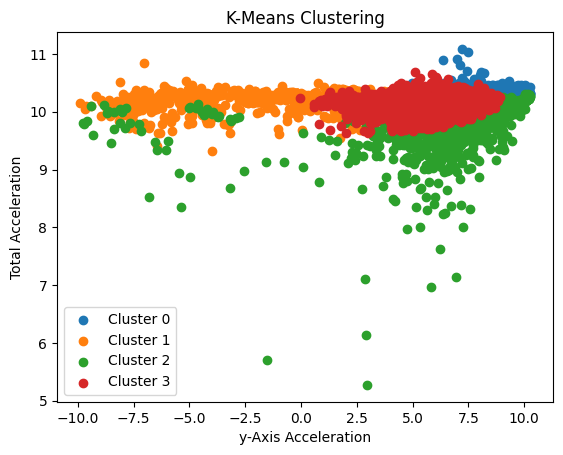

In [ ]:
# Visualize the clusters (example with 2D data)
for cluster_label in range(num_clusters):
    cluster_data = sample_24_hours[sample_24_hours['cluster'] == cluster_label]
    plt.scatter(cluster_data['y'], cluster_data['total_acceleration'], label=f'Cluster {cluster_label}')
plt.xlabel('y-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

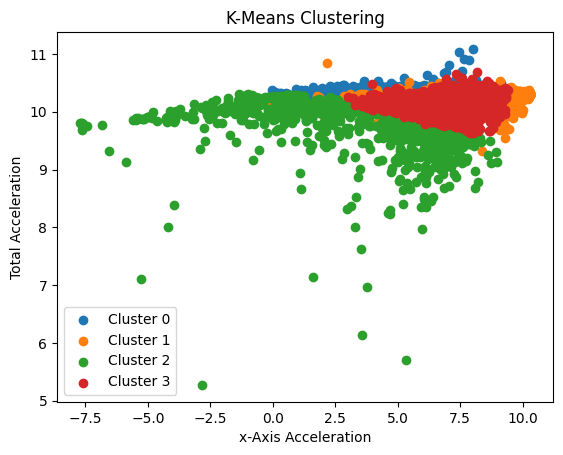

In [ ]:
# Visualize the clusters (example with 2D data)
for cluster_label in range(num_clusters):
    cluster_data = sample_24_hours[sample_24_hours['cluster'] == cluster_label]
    plt.scatter(cluster_data['z'], cluster_data['total_acceleration'], label=f'Cluster {cluster_label}')
plt.xlabel('x-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
sample_24_hours

,timestamp,x,y,z,total_acceleration,cluster
12600,2015-06-13 00:00:00,4.060032,7.421592,5.961864,10.349285,0
12601,2015-06-13 00:00:03,4.026024,7.381044,6.104436,10.390035,0
12602,2015-06-13 00:00:06,3.931595,7.372057,6.085997,10.336538,0
12603,2015-06-13 00:00:09,3.958008,7.424208,6.065196,10.371658,0
12604,2015-06-13 00:00:12,4.015560,7.435980,5.984100,10.355094,0
...,...,...,...,...,...,...
41396,2015-06-13 23:59:48,2.449884,8.219472,5.763048,10.333169,0
41397,2015-06-13 23:59:51,2.500896,8.142300,5.846760,10.331318,0
41398,2015-06-13 23:59:54,2.453808,8.224704,5.780052,10.347750,0
41399,2015-06-13 23:59:57,2.445960,8.173692,5.889924,10.367409,0


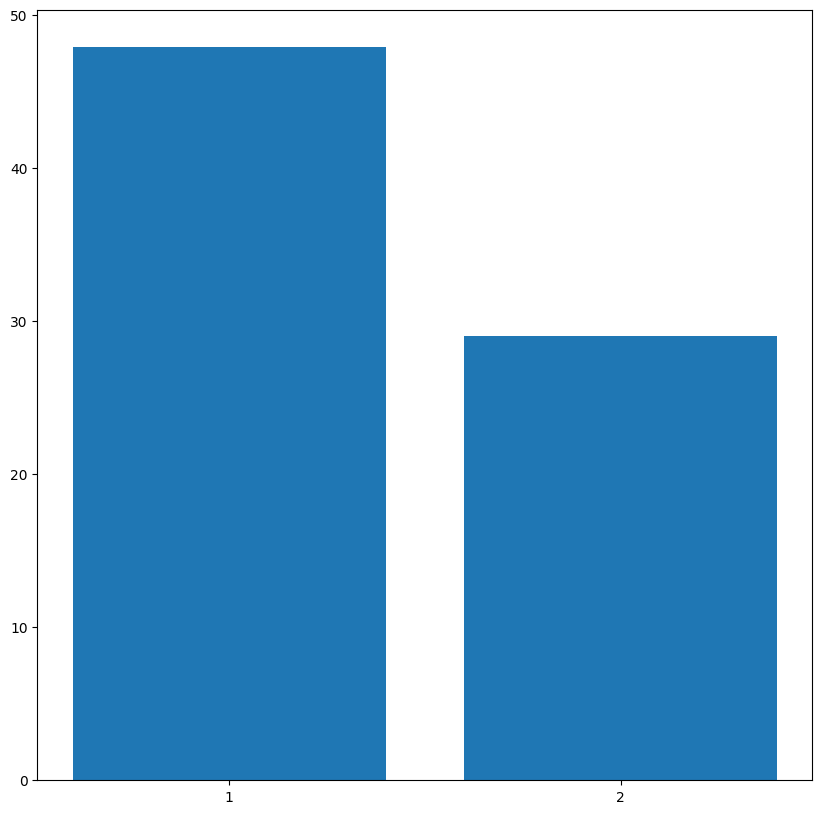

In [ ]:
plt.figure(figsize=(10,10))
var=np.round(pca.explained_variance_ratio_*100,decimals=1)
lbls=[str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1),height=var,tick_label=lbls)
plt.show()

In [ ]:
sample_24_hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28801 entries, 12600 to 41400
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           28801 non-null  datetime64[ns]
 1   x                   28801 non-null  float64       
 2   y                   28801 non-null  float64       
 3   z                   28801 non-null  float64       
 4   total_acceleration  28801 non-null  float64       
 5   cluster             28801 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 1.4 MB


In [ ]:
cluster0_median=sample_24_hours.loc[sample_24_hours['cluster']==0,'total_acceleration'].median()

In [ ]:
cluster0_median

10.359536545465154

In [ ]:
cluster1_median=sample_24_hours.loc[sample_24_hours['cluster']==1,'total_acceleration'].median()
cluster1_median

10.297646171519265

In [ ]:
cluster2_median=sample_24_hours.loc[sample_24_hours['cluster']==2,'total_acceleration'].median()
cluster2_median

9.93813654260516

In [ ]:
cluster3_median=sample_24_hours.loc[sample_24_hours['cluster']==3,'total_acceleration'].median()
cluster3_median

10.23591817990924

Since the cluster with high median corresponds to Rumination and least corresponds to Resting.From the above calculation we can classify the clusters as below

Cluster0:Rumination

Cluster1:eating


Cluster2:Resting

Cluster3:Standing

In [ ]:
sample_24_hours.count()

timestamp             28801
x                     28801
y                     28801
z                     28801
total_acceleration    28801
cluster               28801
dtype: int64

In [ ]:
sample_24_hours

,timestamp,x,y,z,total_acceleration,cluster
12600,2015-06-13 00:00:00,4.060032,7.421592,5.961864,10.349285,0
12601,2015-06-13 00:00:03,4.026024,7.381044,6.104436,10.390035,0
12602,2015-06-13 00:00:06,3.931595,7.372057,6.085997,10.336538,0
12603,2015-06-13 00:00:09,3.958008,7.424208,6.065196,10.371658,0
12604,2015-06-13 00:00:12,4.015560,7.435980,5.984100,10.355094,0
...,...,...,...,...,...,...
41396,2015-06-13 23:59:48,2.449884,8.219472,5.763048,10.333169,0
41397,2015-06-13 23:59:51,2.500896,8.142300,5.846760,10.331318,0
41398,2015-06-13 23:59:54,2.453808,8.224704,5.780052,10.347750,0
41399,2015-06-13 23:59:57,2.445960,8.173692,5.889924,10.367409,0


In [ ]:
df1=sample_24_hours
df1

,timestamp,x,y,z,total_acceleration,cluster
12600,2015-06-13 00:00:00,4.060032,7.421592,5.961864,10.349285,0
12601,2015-06-13 00:00:03,4.026024,7.381044,6.104436,10.390035,0
12602,2015-06-13 00:00:06,3.931595,7.372057,6.085997,10.336538,0
12603,2015-06-13 00:00:09,3.958008,7.424208,6.065196,10.371658,0
12604,2015-06-13 00:00:12,4.015560,7.435980,5.984100,10.355094,0
...,...,...,...,...,...,...
41396,2015-06-13 23:59:48,2.449884,8.219472,5.763048,10.333169,0
41397,2015-06-13 23:59:51,2.500896,8.142300,5.846760,10.331318,0
41398,2015-06-13 23:59:54,2.453808,8.224704,5.780052,10.347750,0
41399,2015-06-13 23:59:57,2.445960,8.173692,5.889924,10.367409,0


In [ ]:
df1.set_index('timestamp',inplace=True)

In [ ]:
df1

,x,y,z,total_acceleration,cluster
timestamp,,,,,
2015-06-13 00:00:00,4.060032,7.421592,5.961864,10.349285,0
2015-06-13 00:00:03,4.026024,7.381044,6.104436,10.390035,0
2015-06-13 00:00:06,3.931595,7.372057,6.085997,10.336538,0
2015-06-13 00:00:09,3.958008,7.424208,6.065196,10.371658,0
2015-06-13 00:00:12,4.015560,7.435980,5.984100,10.355094,0
...,...,...,...,...,...
2015-06-13 23:59:48,2.449884,8.219472,5.763048,10.333169,0
2015-06-13 23:59:51,2.500896,8.142300,5.846760,10.331318,0
2015-06-13 23:59:54,2.453808,8.224704,5.780052,10.347750,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz



In [ ]:
X=df1.drop('cluster',axis=1)
Y=df1['cluster']
X

,x,y,z,total_acceleration
timestamp,,,,
2015-06-13 00:00:00,4.060032,7.421592,5.961864,10.349285
2015-06-13 00:00:03,4.026024,7.381044,6.104436,10.390035
2015-06-13 00:00:06,3.931595,7.372057,6.085997,10.336538
2015-06-13 00:00:09,3.958008,7.424208,6.065196,10.371658
2015-06-13 00:00:12,4.015560,7.435980,5.984100,10.355094
...,...,...,...,...
2015-06-13 23:59:48,2.449884,8.219472,5.763048,10.333169
2015-06-13 23:59:51,2.500896,8.142300,5.846760,10.331318
2015-06-13 23:59:54,2.453808,8.224704,5.780052,10.347750


In [ ]:
Y

timestamp
2015-06-13 00:00:00    0
2015-06-13 00:00:03    0
2015-06-13 00:00:06    0
2015-06-13 00:00:09    0
2015-06-13 00:00:12    0
                      ..
2015-06-13 23:59:48    0
2015-06-13 23:59:51    0
2015-06-13 23:59:54    0
2015-06-13 23:59:57    0
2015-06-14 00:00:00    0
Name: cluster, Length: 28801, dtype: int32

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
X_train

,x,y,z,total_acceleration
timestamp,,,,
2015-06-13 13:32:42,4.710066,8.065719,4.499942,10.367739
2015-06-13 20:39:12,-5.354952,1.808964,8.592252,10.284681
2015-06-13 02:00:36,3.819360,7.751208,5.524992,10.256426
2015-06-13 20:08:09,3.322320,5.755200,5.732964,8.776503
2015-06-13 17:33:36,5.162676,7.640028,4.536144,10.276179
...,...,...,...,...
2015-06-13 17:58:45,4.546608,5.595624,7.315644,10.271383
2015-06-13 04:29:30,2.701020,7.600788,6.549156,10.390329
2015-06-13 00:43:00,4.686564,7.350960,5.623092,10.373990


In [ ]:
Y_train

timestamp
2015-06-13 13:32:42    0
2015-06-13 20:39:12    1
2015-06-13 02:00:36    0
2015-06-13 20:08:09    2
2015-06-13 17:33:36    0
                      ..
2015-06-13 17:58:45    0
2015-06-13 04:29:30    0
2015-06-13 00:43:00    0
2015-06-13 13:09:45    3
2015-06-13 19:42:42    1
Name: cluster, Length: 23040, dtype: int32

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
Y_pred=rf.predict(X_test)


In [ ]:
accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9939246658566221


In [ ]:
rtrain_yhat=rf.predict(X_train)
train_acc=accuracy_score(Y_train,rtrain_yhat)

print("Train Accuracy:",train_acc)
print("Test Accuaracy",accuracy)

Train Accuracy: 1.0
Test Accuaracy 0.9939246658566221


In [ ]:
param_dist={'n_estimators':randint(50,500),
            'max_depth':randint(1,20)}


rf=RandomForestClassifier()
rand_search=RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=5,cv=5)
rand_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc99101ab90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bc984538bb0>})

In [ ]:
best_rf=rand_search.best_estimator_
print("Best hyperparameters:",rand_search.best_params_)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 66}


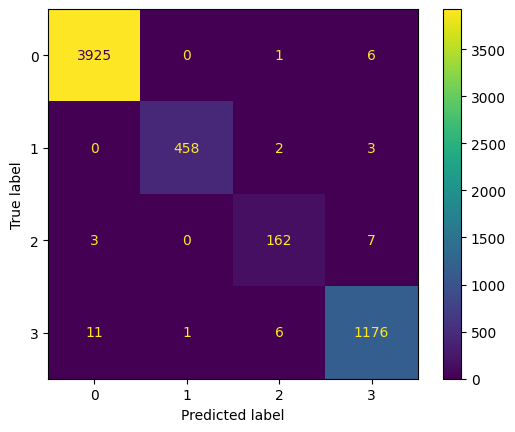

In [ ]:
Y_pred=best_rf.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3932
           1       1.00      0.99      0.99       463
           2       0.95      0.94      0.94       172
           3       0.99      0.98      0.99      1194

    accuracy                           0.99      5761
   macro avg       0.98      0.98      0.98      5761
weighted avg       0.99      0.99      0.99      5761



In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

KNN Model

In [ ]:
Xk_train=scaler.fit_transform(X_train)
Xk_test=scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(Xk_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
Yk_pred=knn.predict(Xk_test)

In [ ]:
kaccuracy=accuracy_score(Y_test,Yk_pred)
print("KNN Accuracy:",kaccuracy)

KNN Accuracy: 0.9920152751258462


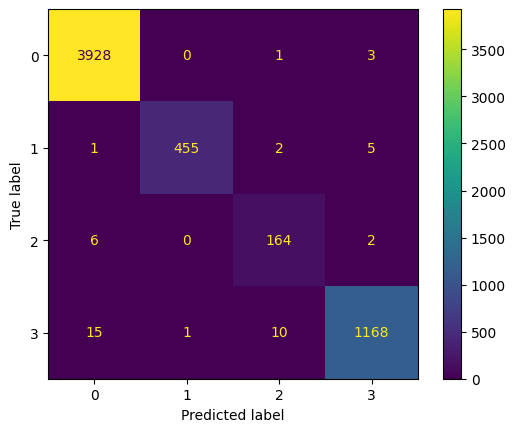

In [ ]:
cm=confusion_matrix(Y_test,Yk_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print(classification_report(Y_test,Yk_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3932
           1       1.00      0.98      0.99       463
           2       0.93      0.95      0.94       172
           3       0.99      0.98      0.98      1194

    accuracy                           0.99      5761
   macro avg       0.98      0.98      0.98      5761
weighted avg       0.99      0.99      0.99      5761



In [ ]:

train_yhat=knn.predict(Xk_train)
train_acc=accuracy_score(Y_train,train_yhat)

print("Train Accuracy:",train_acc)
print("Test Accuaracy",kaccuracy)





Train Accuracy: 0.9962239583333333
Test Accuaracy 0.9920152751258462


Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [ ]:
dtc=DecisionTreeClassifier()
dtc=dtc.fit(X_train,Y_train)

In [ ]:
Yd_pred=dtc.predict(X_test)

In [ ]:
daccuracy=accuracy_score(Y_test,Yd_pred)
print("Decision Tree Accuracy:",daccuracy)

Decision Tree Accuracy: 0.987328588786669


In [ ]:
dtc1=DecisionTreeClassifier(criterion="entropy",max_depth=5)
dtc1=dtc1.fit(X_train,Y_train)
Yd1_pred=dtc1.predict(X_test)


In [ ]:
d1accuracy=accuracy_score(Y_test,Yd1_pred)
print("Decision Tree Accuracy:",d1accuracy)

Decision Tree Accuracy: 0.9640687380663079


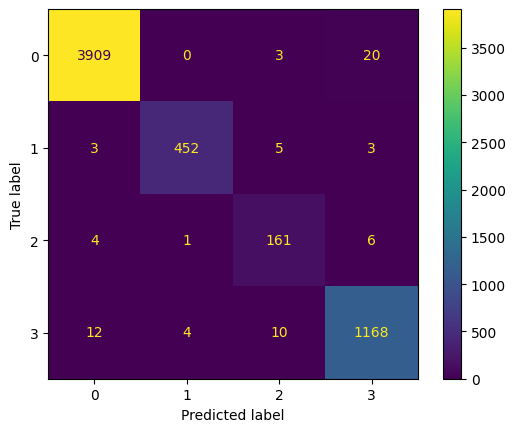

In [ ]:
cm=confusion_matrix(Y_test,Yd_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print(classification_report(Y_test,Yd_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3932
           1       0.99      0.98      0.98       463
           2       0.89      0.93      0.91       172
           3       0.98      0.97      0.98      1194

    accuracy                           0.99      5761
   macro avg       0.96      0.97      0.97      5761
weighted avg       0.99      0.99      0.99      5761



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
Xs_train=scaler.fit_transform(X_train)
Xs_test=scaler.transform(X_test)

In [ ]:
classifier=SVC(kernel='rbf',random_state=42)
classifier.fit(Xs_train,Y_train)


SVC(random_state=42)

In [ ]:
Ys_pred=classifier.predict(Xs_test)

In [ ]:
saccuracy=accuracy_score(Y_test,Ys_pred)
print("SVM Accuracy:",saccuracy)

SVM Accuracy: 0.9960076375629231


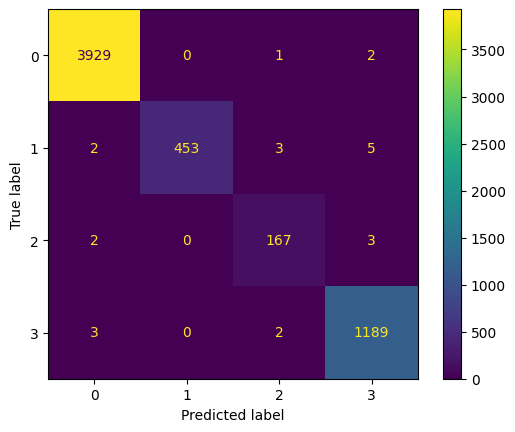

In [ ]:
cm=confusion_matrix(Y_test,Ys_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print(classification_report(Y_test,Ys_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3932
           1       1.00      0.98      0.99       463
           2       0.97      0.97      0.97       172
           3       0.99      1.00      0.99      1194

    accuracy                           1.00      5761
   macro avg       0.99      0.99      0.99      5761
weighted avg       1.00      1.00      1.00      5761



In [ ]:
strain_yhat=classifier.predict(Xs_train)
train_acc=accuracy_score(Y_train,strain_yhat)

print("Train Accuracy:",train_acc)
print("Test Accuaracy",saccuracy)

Train Accuracy: 0.9976128472222222
Test Accuaracy 0.9960076375629231
